In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
from load_data import load

df = load()
df

,RegionID,SizeRankZip,RegionName,RegionType,StateName,State,City,Metro,CountyName,ZHVI 2003,...,Days on Market 2020,Days on Market 2021,Days on Market 2022,Days on Market 2023,New Construction 2018,New Construction 2019,New Construction 2020,New Construction 2021,New Construction 2022,New Construction 2023
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,215776.356117,...,58.750000,33.416667,31.000000,46.500000,1563.916667,1167.75,1471.083333,1611.666667,1921.25,1851.25
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,111490.450128,...,58.750000,33.416667,31.000000,46.500000,1563.916667,1167.75,1471.083333,1611.666667,1921.25,1851.25
2,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,109631.516990,...,58.750000,33.416667,31.000000,46.500000,1563.916667,1167.75,1471.083333,1611.666667,1921.25,1851.25
3,91926,11,77433,zip,TX,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,197878.948831,...,58.750000,33.416667,31.000000,46.500000,1563.916667,1167.75,1471.083333,1611.666667,1921.25,1851.25
4,92036,25,77573,zip,TX,TX,League City,"Houston-The Woodlands-Sugar Land, TX",Galveston County,159151.702851,...,58.750000,33.416667,31.000000,46.500000,1563.916667,1167.75,1471.083333,1611.666667,1921.25,1851.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124310,59275,28822,3890,zip,NH,NH,Ossipee,NaN,Carroll County,NaN,...,28.916667,14.333333,13.500000,15.666667,NaN,NaN,NaN,NaN,NaN,NaN
124311,59275,28822,3890,zip,NH,NH,Ossipee,NaN,Carroll County,NaN,...,101.416667,41.333333,29.083333,35.833333,NaN,NaN,NaN,NaN,NaN,NaN
124312,59275,28822,3890,zip,NH,NH,Ossipee,NaN,Carroll County,NaN,...,57.000000,26.500000,21.916667,23.250000,NaN,NaN,NaN,NaN,NaN,NaN
124313,59275,28822,3890,zip,NH,NH,Ossipee,NaN,Carroll County,NaN,...,41.125000,21.000000,22.416667,30.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
with open('transit_scores_data.csv', 'r', encoding='ISO-8859-1') as f1:
    df2 = pd.read_csv(f1)

df_merged = pd.merge(df[['RegionID', 'City', 'State', 'ZHVI 2023', 'ZORI 2023', 'Days on Market 2023']].dropna(subset=['City']), df2, on='City', how='left')

In [4]:
df_merged

,RegionID,City,State_x,ZHVI 2023,ZORI 2023,Days on Market 2023,Rank,State_y,Score,TCI,Jobs,Trips/Week,Routes,Transit Shed (sq mi),Transit percentage,Population
0,91982,Katy,TX,473309.572520,1862.764273,46.500000,2929.0,TX,0.2,0.1,56,40,0.0,0.0,0.013,"24,783"
1,91940,Katy,TX,276410.405397,1810.344525,46.500000,2929.0,TX,0.2,0.1,56,40,0.0,0.0,0.013,"24,783"
2,91733,Houston,TX,269296.564130,1854.712147,46.500000,660.0,TX,5.9,5.5,"218,774","1,900",5.0,31.0,0.039,"2,439,835"
3,91926,Cypress,TX,423596.917469,1923.681696,46.500000,1313.0,CA,4.2,2.3,"151,919",322,4.0,37.0,0.017,"49,558"
4,92036,League City,TX,369596.437820,1839.301330,46.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128410,59275,Ossipee,NH,323129.134711,NaN,15.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128411,59275,Ossipee,NH,323129.134711,NaN,35.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128412,59275,Ossipee,NH,323129.134711,NaN,23.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128413,59275,Ossipee,NH,323129.134711,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df3 = df_merged.dropna(subset=['Score','ZHVI 2023', 'ZORI 2023'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3951 entries, 0 to 29064
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RegionID              3951 non-null   int64  
 1   City                  3951 non-null   object 
 2   State_x               3951 non-null   object 
 3   ZHVI 2023             3951 non-null   float64
 4   ZORI 2023             3951 non-null   float64
 5   Days on Market 2023   3951 non-null   float64
 6   Rank                  3951 non-null   float64
 7   State_y               3951 non-null   object 
 8   Score                 3951 non-null   float64
 9   TCI                   3951 non-null   float64
 10  Jobs                  3951 non-null   object 
 11  Trips/Week            3951 non-null   object 
 12  Routes                3951 non-null   float64
 13  Transit Shed (sq mi)  3951 non-null   float64
 14  Transit percentage    3951 non-null   float64
 15  Population          

<AxesSubplot:xlabel='Score', ylabel='ZORI 2023'>

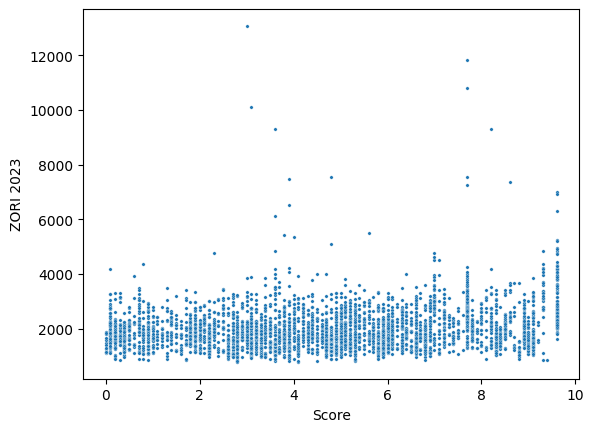

In [6]:
sns.scatterplot(data=df3, x='Score', y='ZORI 2023', s=6)

<AxesSubplot:xlabel='Score', ylabel='Count'>

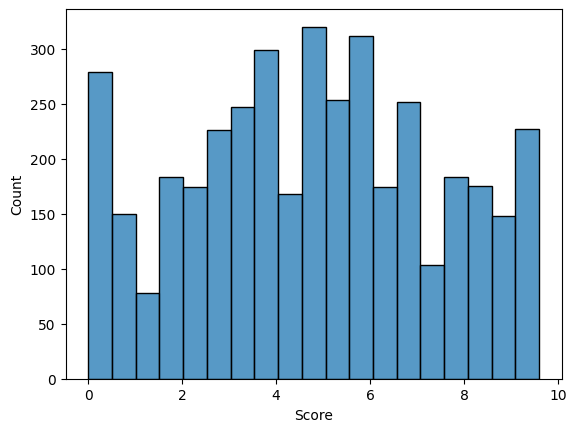

In [7]:
sns.histplot(data=df3, x='Score')

<AxesSubplot:xlabel='ZORI 2023', ylabel='Count'>

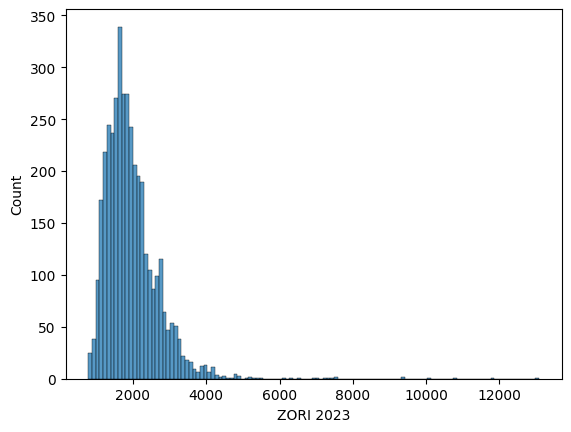

In [8]:
sns.histplot(data=df3, x='ZORI 2023')

<AxesSubplot:xlabel='Score', ylabel='ZORI 2023'>

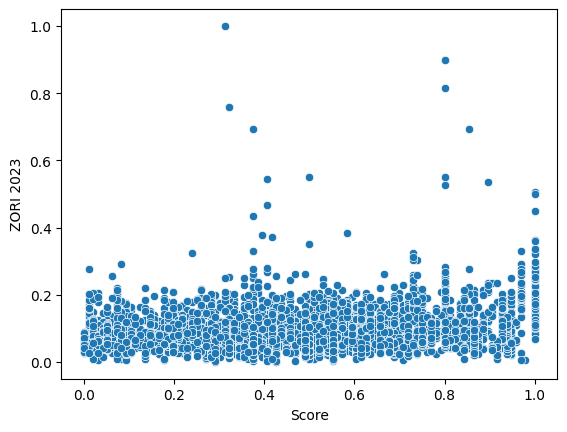

In [9]:
scaler = MinMaxScaler()
normalized_df= scaler.fit_transform(df3[['ZORI 2023', 'Score']])
normalized_df = pd.DataFrame(normalized_df)
normalized_df.columns = ['ZORI 2023', 'Score']
sns.scatterplot(data=normalized_df, x='Score', y= 'ZORI 2023')

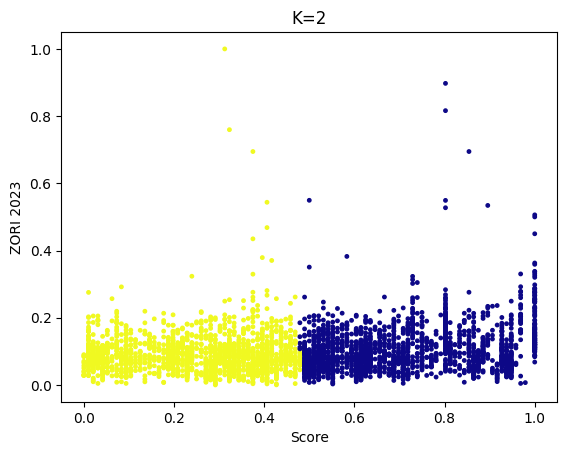

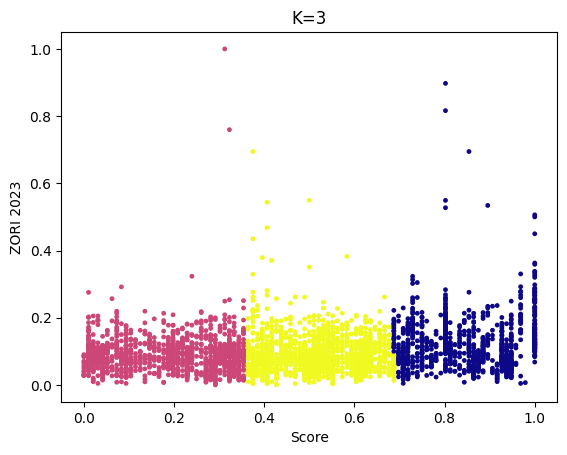

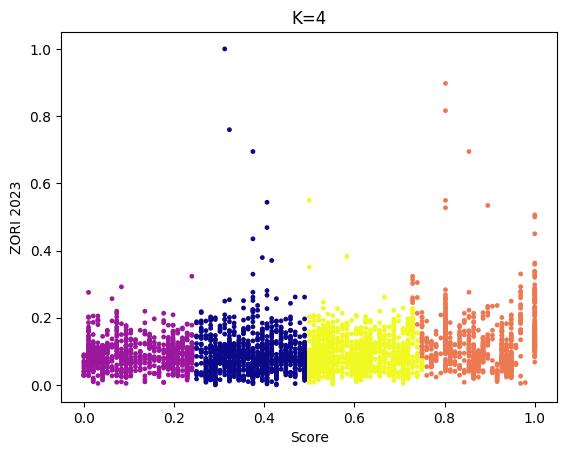

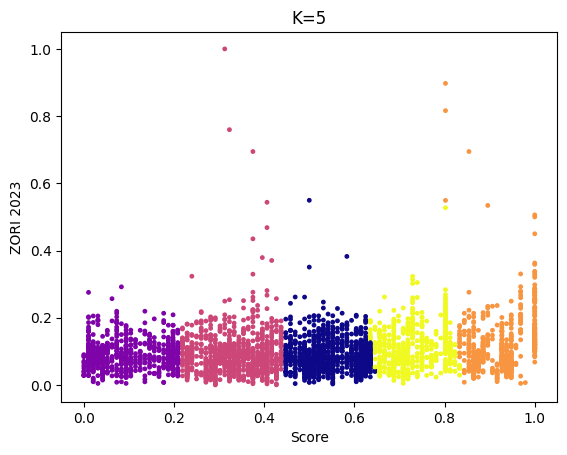

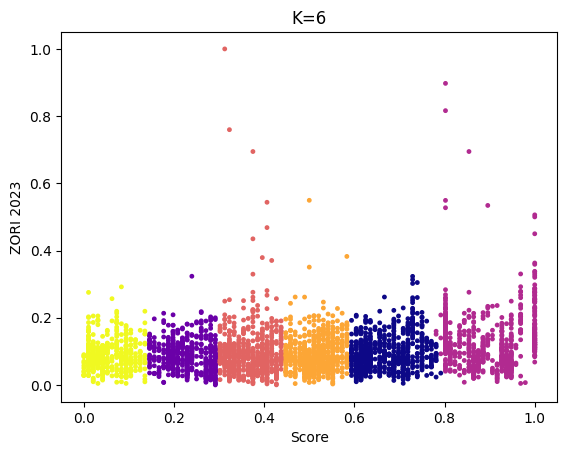

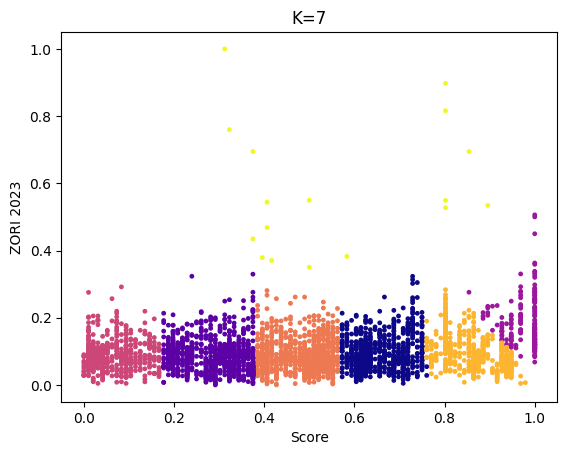

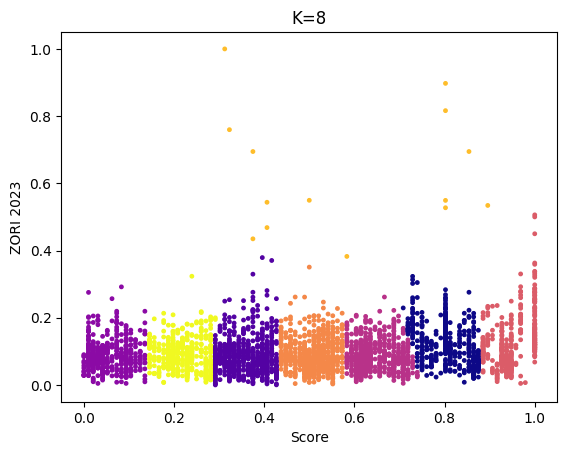

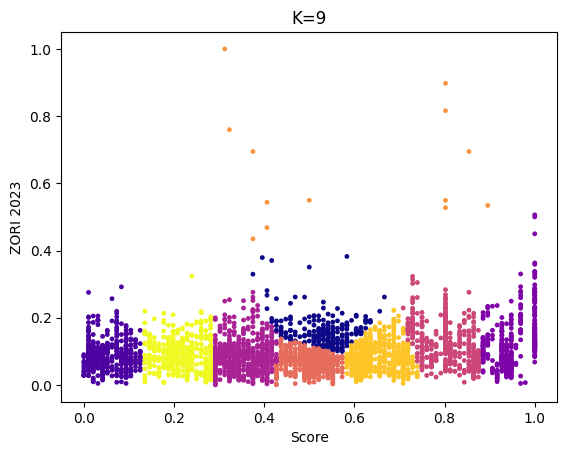

<Figure size 640x480 with 0 Axes>

In [10]:
for k in range(2, 10):
    plt.scatter(normalized_df['Score'], normalized_df['ZORI 2023'], c= KMeans(n_clusters = k).fit_predict(normalized_df[["Score", "ZORI 2023"]]), cmap= plt.cm.plasma, s=6)
    plt.title(f"K={k}")
    plt.xlabel("Score")
    plt.ylabel("ZORI 2023")
    plt.show()
    plt.clf()

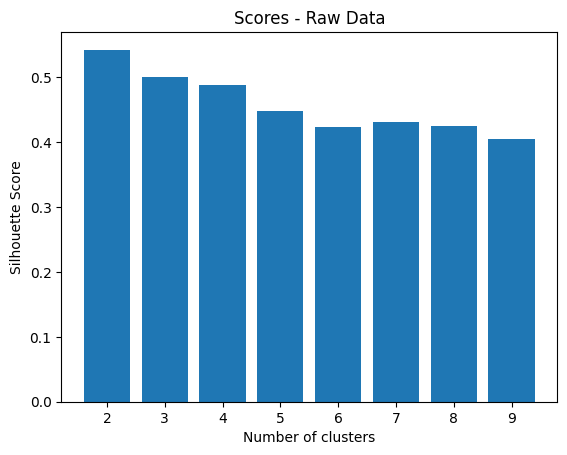

In [11]:
silhouette_scores = []

for k in range(2, 10):
    silhouette_scores.append(
        silhouette_score(normalized_df[["Score", "ZORI 2023"]], KMeans(n_clusters = k).fit_predict(normalized_df[["Score", "ZORI 2023"]])))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6, 7, 8, 9]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title("Scores - Raw Data")
plt.show()

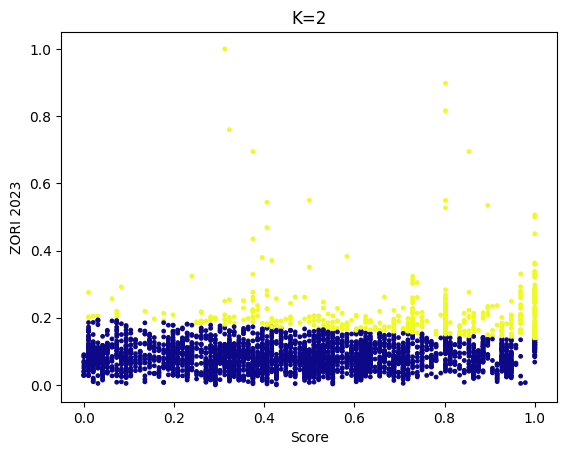

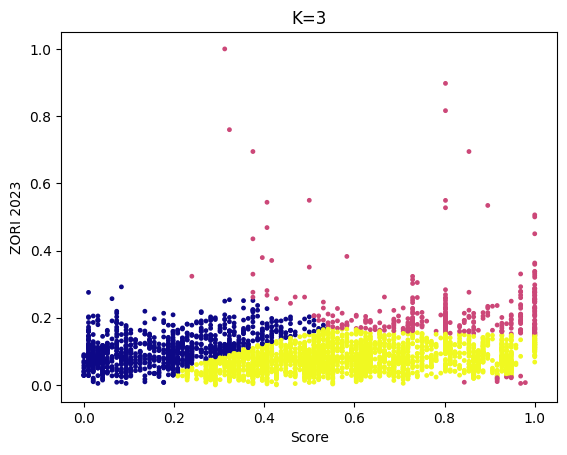

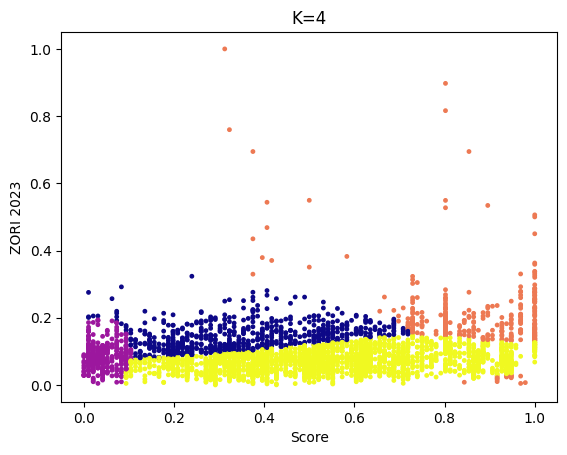

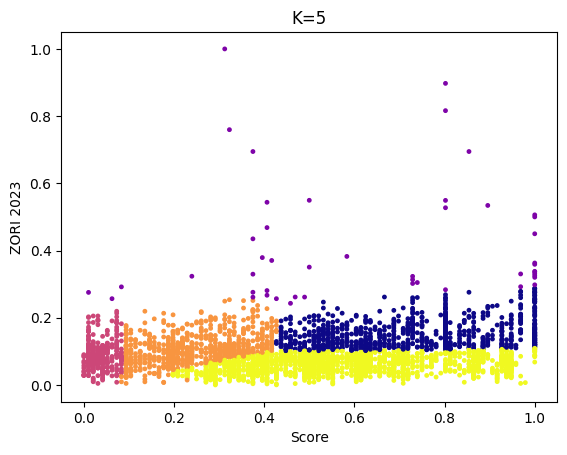

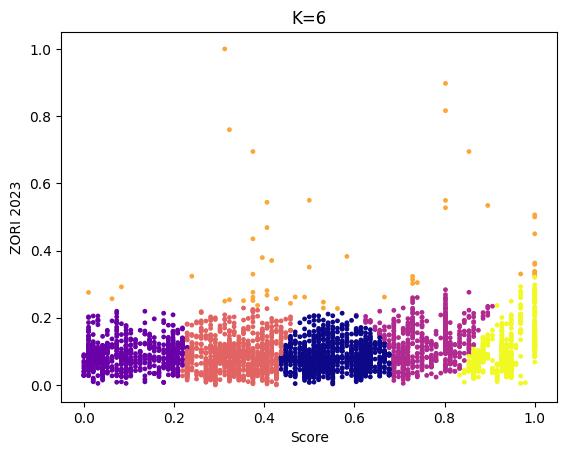

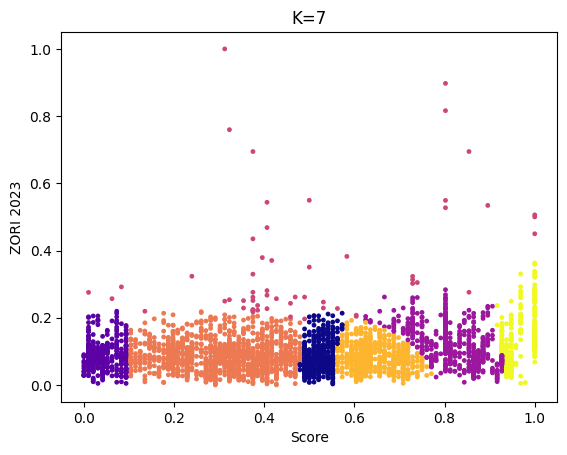

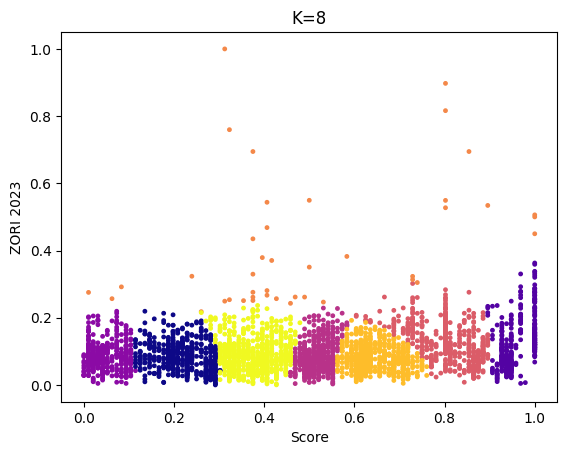

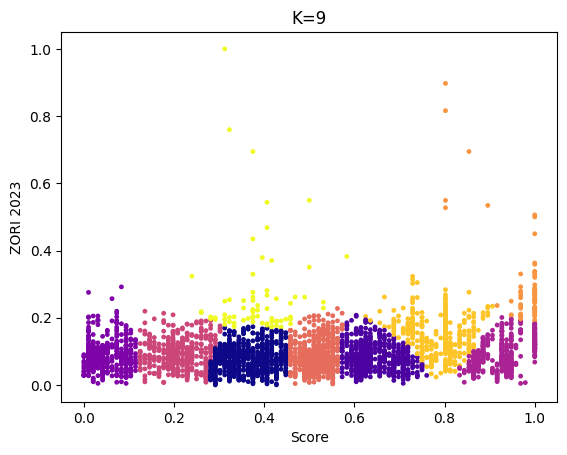

<Figure size 640x480 with 0 Axes>

In [12]:
from sklearn.mixture import GaussianMixture

for k in range(2, 10):
    plt.scatter(normalized_df['Score'], normalized_df['ZORI 2023'], c= GaussianMixture(n_components= k).fit_predict(normalized_df[["Score", "ZORI 2023"]]), cmap= plt.cm.plasma, s=6)
    plt.title(f"K={k}")
    plt.xlabel("Score")
    plt.ylabel("ZORI 2023")
    plt.show()
    plt.clf()

In [13]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [14]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

Text(0, 0.5, 'Score')

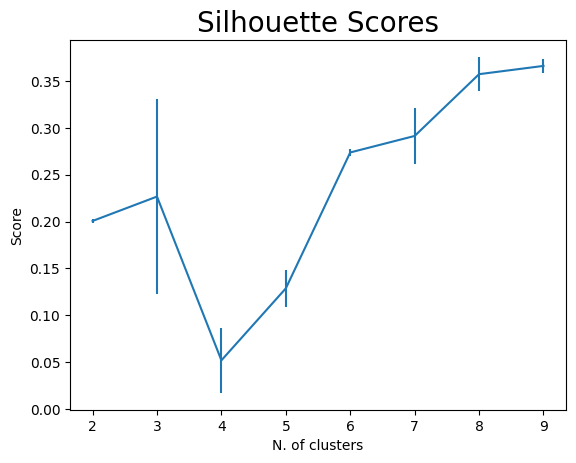

In [15]:

n_clusters=np.arange(2, 10)
sils=[]
sils_err=[]
iterations=5
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(normalized_df) 
        labels=gmm.predict(normalized_df)
        sil=silhouette_score(normalized_df, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")